In [31]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math


D = 1000

L_min = 30
L_max = 130

legend_size = 16
label_size = 14
font_size = 14

c = ["#DD3232", "#F68B69", "#FBAF5F", "#FACF63", "#FFEF6C", "#CED75C", "#A1CE5E", "#969A52", "#00919C","#0065A9", "#955396"]


def rma_pathloss(D=1000):

    r = np.arange(D+1)
    r[0]=1
    
    fc = 2.593 # n41
    fc = 3.550 # n78

    W = 20
    h = 5
    hBS = 35
    hUT = 1.5
    
    PL = 161.04 - 7.1 * np .log10(W)+ +7.5*np.log10(h)
    PL = PL - (24.37 - 3.7 * np.power(h/hBS, 2))* np.log10(hBS)
    PL = PL + (43.42 - 3.1 * np.log10(hBS)) *(np.log10(r) -3)
    PL = PL + 20 * np.log10(fc) - np.power ((3.2 * (np.log10(11.75 * hUT))), 2) - 4.97
    return r, PL

rs, PL = rma_pathloss(D)

In [129]:
def get_q(x, mu = 0, sigma = 1):
    
    a = (x - mu) / sigma
    q_range = 6
    q_resol = 8000
    
    if a > (q_range-1): 
        return 0
    
    if a < 0:
        return 1 - get_q(-a)    

    xs = np.linspace(0, q_range, q_resol)
    q = stats.norm.sf(xs)
    
    return q[np.int_(a / ( q_range / q_resol ))]


def get_prob_L(L):
    
    return 1 / ( L_max - L_min )


def get_prob_R(r):
    
    return 2 * r / np.power(D, 2)


def get_prob_L_given_R(L, r):

    mu = PL[r]
    sigma = 8
 
    qL0 = get_q(L, mu, sigma)
    qL1 = get_q(L + 1, mu, sigma)
    
    prob = qL0 - qL1
    return prob


def get_distribution_L_given_R(r):

    x = np.arange(L_max)
    y = np.zeros(L_max)

    for l in range(L_max):
        y[l] = get_prob_L_given_R(l, r)
    return x, y


def get_prob_R_given_L(r, l):
    
    pLR = get_prob_L_given_R(l, r)
    pR  = get_prob_R(r)
    pL  = get_prob_L(l)
  
    pRL = pLR * pR  / pL
    
    return pRL


def get_distribution_R_given_L(l):
    
    x = np.arange(D)
    y = np.zeros(D)
    
    for r in range(D):
        y[r] = get_prob_R_given_L(r, l)
    
    sum_y = sum(y)
    
    for r in range(D):
        y[r]= y[r] / sum_y
    
    return x, y




In [179]:
def draw_Prob_L_given_R(Roffset=50, Coffset=0):

    for i in range(3):
        r = Roffset + 100 * i
        x, y = get_distribution_L_given_R(r)

        plt_color = c[ (i+Coffset) % len(c)]
        plt.plot(x, y, color = plt_color, label = "R={}".format(r))
        plt.fill_between(x, 0, y, color = plt_color, alpha=0.3)

    plt.xlabel("pathloss (dB)", fontsize = font_size)
    plt.ylabel("probability", fontsize = label_size)
    plt.legend(loc="upper left")

    
def draw_Prob_R_given_L(Loffset=50, Coffset=0):
    
    for i in range(3):
        l = 10 * i + Loffset
        x, y = get_distribution_R_given_L(l)
        print (sum(y))
        
        plt_color = c[ (i+Coffset) % len(c)]
        plt.plot(x, y, color = plt_color, label = "l={}".format(l))
        plt.fill_between(x, 0, y, color = plt_color, alpha=0.3)

    plt.xlabel("distance between UE and BS", fontsize=font_size)
    plt.ylabel("probability", fontsize=label_size)
    #plt.legend(loc="lower right", prop={'size': legend_size})
    plt.legend()
    
def draw_Prob_R():
    
    x = np.arange(D)
    y = np.zeros(D) 
    
    for r in range(D):
        y[r] = get_prob_R(r)
    
    plt.plot(x, y)

    
def draw_Prob_L():
    
    x = np.arange(L_max)
    y = np.zeros(L_max)
    
    for l in range(L_max):
        y[l] = get_prob_L(l)
    
    plt.plot(x, y)


In [180]:
def main():
    #draw_Prob_L()
    #draw_Prob_R()   
    draw_Prob_L_given_R()
    #draw_Prob_R_given_L()



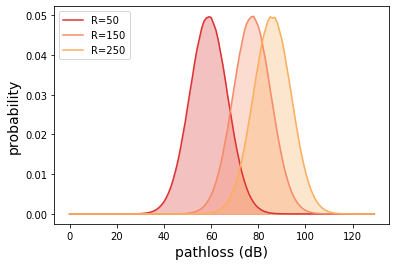

In [181]:
main()

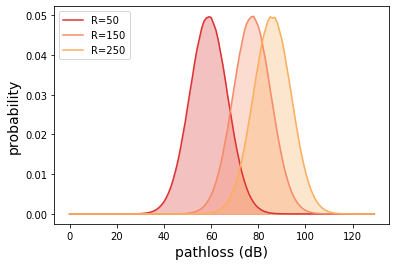

In [182]:
 draw_Prob_L_given_R(50, 0)

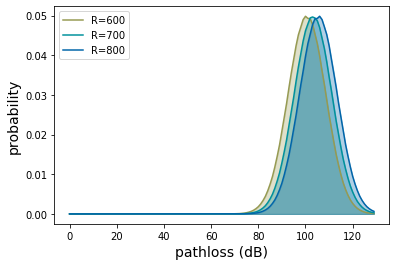

In [183]:
 draw_Prob_L_given_R(600, 7)

0.9999999999999998
0.9999999999999989
1.0000000000000002


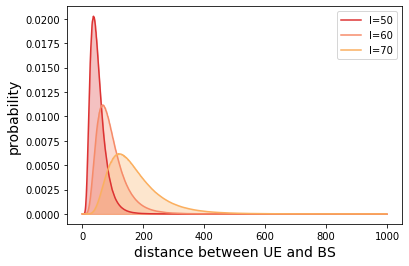

In [184]:
draw_Prob_R_given_L()

0.9999999999999993
0.9999999999999984
0.9999999999999994


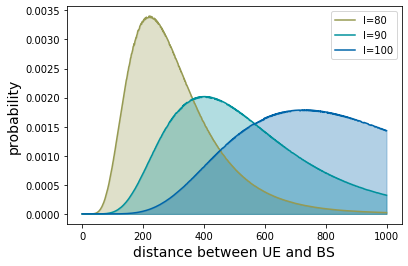

In [185]:
draw_Prob_R_given_L(80, 7)

